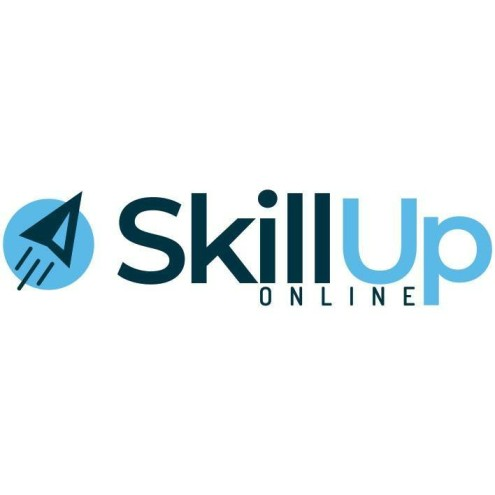


# **Project-5-Measure-Energy-Consumption-Part-6-Model Development & Evaluation **

Dataset Link: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption

### Importing Necessary Libraries

In [1]:
#Write Your Code Here
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



### Import and read dataset

In [1]:
#Write Your Code Here
import pandas as pd
df=pd.read_csv("AEP_hourly.csv")
print(df)


                   Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]


In [2]:
#df.info()

In [3]:
#df.describe()


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Start by importing the pandas library: import pandas as pd
    
Use the read_csv() function to load the CSV file into a pandas DataFrame. Specify the file path in the parentheses, for example: pd.read_csv("file_path.csv")
    
Assign the resulting DataFrame to a variable name, for example: data = pd.read_csv("file_path.csv")
    
Use the head() method on the DataFrame to display the first 10 rows, for example: data.head(10)
    
Make sure to replace "file_path.csv" with the actual file path and name of your CSV file.

```

 

</details>

### Data Cleaning

a. Missing Value

In [2]:
#Write Your Code Here
df=df.dropna()
print(df)

                   Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]


<details><summary><b>Click Here for the Hint</b></summary>

 

```

    Use the DataFrame variable name followed by the isnull() method to create a Boolean DataFrame where True indicates a null value and False indicates a non-null value.

    Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of null values) in each column.

    Putting these together, the code would look like this: data.isnull().sum()


    This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

b. Duplicate data

In [3]:
#Write Your Code Here
# number of duplicate data is Zero
print('The number of duplicate is',df.duplicated().sum())

# print the data without duplicate values
df = df.drop_duplicates()
print(df)

The number of duplicate is 0
                   Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Use the DataFrame variable name followed by the duplicated() method to create a Boolean DataFrame where True indicates a duplicate row and False indicates a non-duplicate row.

Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of duplicate rows).

Putting these together, the code would look like this: data.duplicated().sum()

This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

### Data Analysis

c. seperate date and time

In [4]:
#Write Your Code Here
df = pd.read_csv('AEP_hourly.csv')
df = df.dropna()
df = df.drop_duplicates()

#Split the datetime column into separate date and time columns
df[['Date', 'Time']] = df['Datetime'].str.split(' ', expand=True)
print(df)

                   Datetime   AEP_MW        Date      Time
0       2004-12-31 01:00:00  13478.0  2004-12-31  01:00:00
1       2004-12-31 02:00:00  12865.0  2004-12-31  02:00:00
2       2004-12-31 03:00:00  12577.0  2004-12-31  03:00:00
3       2004-12-31 04:00:00  12517.0  2004-12-31  04:00:00
4       2004-12-31 05:00:00  12670.0  2004-12-31  05:00:00
...                     ...      ...         ...       ...
121268  2018-01-01 20:00:00  21089.0  2018-01-01  20:00:00
121269  2018-01-01 21:00:00  20999.0  2018-01-01  21:00:00
121270  2018-01-01 22:00:00  20820.0  2018-01-01  22:00:00
121271  2018-01-01 23:00:00  20415.0  2018-01-01  23:00:00
121272  2018-01-02 00:00:00  19993.0  2018-01-02  00:00:00

[121273 rows x 4 columns]


In [6]:
#Write Your Code Here


1. When was the higest Energy Consumption and which Year

Maximum

In [5]:
#write your code here 
max_row = df.sort_values('AEP_MW', ascending=False).iloc[0]

# Extract the date and energy consumption values from the max row
max_date = max_row['Datetime']
max_energy = max_row['AEP_MW']

# Extract the year from the max date
max_year = pd.to_datetime(max_date).year

# Print the results
print('Highest energy consumption:', max_energy)
print('Year with highest energy consumption:', max_year)

Highest energy consumption: 25695.0
Year with highest energy consumption: 2008


Minimum

In [6]:
#Write Your Code Here
# Find the row with the lowest energy consumption
min_row = df.sort_values('AEP_MW', ascending=True).iloc[0]

# Extract the date and energy consumption values from the min row
min_date = min_row['Datetime']
min_energy = min_row['AEP_MW']

# Extract the year from the min date
min_year = pd.to_datetime(min_date).year

# Print the results
print('Lowest energy consumption:', min_energy)
print('Year with lowest energy consumption:', min_year)

Lowest energy consumption: 9581.0
Year with lowest energy consumption: 2016


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
First, a new column "New_Date" is created in the DataFrame 'df' by converting the existing "Datetime" column into a date using the 'pd.to_datetime' function and then extracting the date component using 'dt.date'.
Then a new column "New_Time" is created in the DataFrame 'df' by converting the existing "Datetime" column into time using the 'pd.to_datetime' function and then extracting the time component using 'dt.time'.
A new DataFrame 'df1' is created as a copy of 'df'.
To find the date and year when the highest energy consumption occurred, we can use the 'max()' function to find the maximum value of the "AEP_MW" column in the DataFrame 'df' and then filter 'df1' to return the row(s) where the "AEP_MW" column matches this maximum value.
Similarly, to find the date and year when the lowest energy consumption occurred, we can use the 'min()' function to find the minimum value of the "AEP_MW" column in the DataFrame 'df' and then filter 'df1' to return the row(s) where the "AEP_MW" column matches this minimum value.
    
```

 

</details>

2. Calculate the weekly energy usage for the entire dataset

In [7]:
#write your code here

# Convert the 'Datetime' column to a datetime object

# Set the 'Datetime' column as the index

# Get the weekly energy usage for the entire dataset
import pandas as pd
df = pd.read_csv('AEP_hourly.csv')
df = df.dropna()
df = df.drop_duplicates()

# Convert the 'Datetime' column to a datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the 'Datetime' column as the index
df = df.set_index('Datetime')

weekly_energy = df.resample('W').sum()
print(weekly_energy)

               AEP_MW
Datetime             
2004-10-03   933991.0
2004-10-10  2332037.0
2004-10-17  2378184.0
2004-10-24  2379237.0
2004-10-31  2325624.0
...               ...
2018-07-08  2707980.0
2018-07-15  2799780.0
2018-07-22  2616533.0
2018-07-29  2588782.0
2018-08-05  1488102.0

[723 rows x 1 columns]


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
First, the pandas library is imported using the alias "pd".
Next, the "Datetime" column of the DataFrame 'df' is converted into a datetime object using the 'pd.to_datetime' function.
The 'set_index' method is used to set the "Datetime" column as the index of the DataFrame 'df'.
The 'resample' method is applied to the "AEP_MW" column of the DataFrame 'df' with a weekly frequency ('W') to calculate the weekly energy usage.
The 'sum' function is used to aggregate the values of the "AEP_MW" column for each week.
The resulting weekly energy usage is stored in a new variable 'weekly_energy'.
Finally, the 'print' function is used to display the weekly energy usage.
```

 

</details>

### Data Visualization

1. Plot a histogram of the hourly energy usage distribution for a specific month

                   Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]


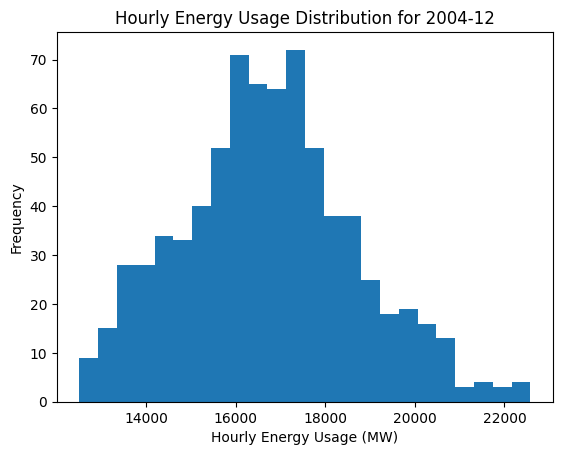

In [4]:
# Write your code here
import numpy as np
import seaborn as sns
import os
import datetime
import matplotlib.pyplot as plt
df=pd.read_csv("AEP_hourly.csv")
print(df)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

month = '2004-12'
hourly_energy = df.loc[month]['AEP_MW']

plt.hist(hourly_energy, bins=24)
plt.xlabel('Hourly Energy Usage (MW)')
plt.ylabel('Frequency')
plt.title(f'Hourly Energy Usage Distribution for {month}')
plt.show()

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
First, the pandas library and the matplotlib.pyplot module are imported using the aliases "pd" and "plt", respectively.
The 'read_csv' method is used to load the energy dataset from a CSV file called 'AEP_hourly.csv' into a pandas DataFrame called 'df'.
The "Datetime" column of the DataFrame 'df' is converted into a datetime object using the 'pd.to_datetime' function.
The 'set_index' method is used to set the "Datetime" column as the index of the DataFrame 'df'.
A variable 'month' is created to store a specific month in the format "YYYY-MM" (e.g., "2017-01" for January 2017).
The 'loc' method is used to extract the "AEP_MW" column values for the month specified in the 'month' variable. The resulting hourly energy usage values are stored in a new variable 'hourly_energy'.
A histogram of the hourly energy usage distribution is plotted using the 'hist' function of matplotlib.pyplot. The 'bins' parameter is set to 24 to create 24 equally sized bins for the 24 hours in a day. The 'set_xlabel', 'set_ylabel', and 'set_title' methods are used to set the labels and title of the histogram. The resulting histogram is displayed using the 'show' method of matplotlib.pyplot.
```

 

</details>

2. show the Relationship of Energy vs Year


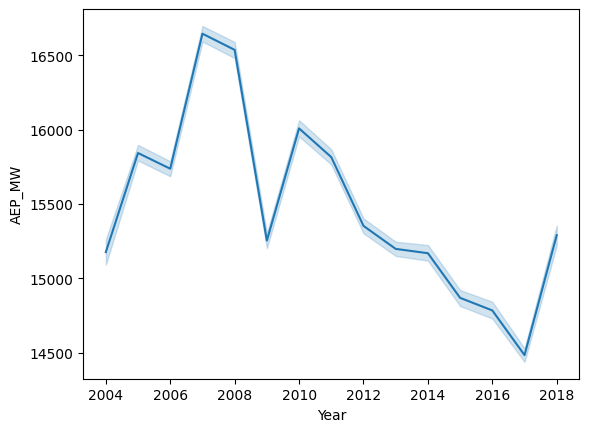

In [3]:
# Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('AEP_hourly.csv')
df['New_Date'] = pd.to_datetime(df['Datetime']).dt.date
df['New_Time'] = pd.to_datetime(df['Datetime']).dt.time

df1 = df.copy()
df1['Year'] = pd.DatetimeIndex(df1['New_Date']).year



sns.lineplot(data=df1, x='Year', y='AEP_MW')
plt.show()

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
First, the pandas library is imported using the alias "pd".
The 'read_csv' method is used to load the energy dataset from a CSV file called 'AEP_hourly.csv' into a pandas DataFrame called 'df'.
Two new columns are added to the DataFrame 'df' using the 'pd.to_datetime' function and the 'dt.date' and 'dt.time' attributes to extract the date and time from the "Datetime" column. These new columns are named "New_Date" and "New_Time", respectively.
A new DataFrame 'df1' is created with the same data as the original DataFrame 'df'.
A new column "Year" is added to the DataFrame 'df1' using the 'pd.DatetimeIndex' function to extract the year from the "New_Date" column.
The seaborn library is imported using the alias "sns".
The 'lineplot' function from seaborn is used to plot a line graph of the "AEP_MW" column values against the "Year" column values. The resulting line graph is displayed.
```

 

</details>

## Model Development & Evaluation

In [1]:
#Write Your Code Here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the energy dataset into a pandas DataFrame
df = pd.read_csv('AEP_hourly.csv')

# Convert the 'Datetime' column to a pandas datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Create a new column called 'Timestamp' by converting the 'Datetime' column to Unix timestamp
df['Timestamp'] = df['Datetime'].astype('int64') // 10**9

# Set the index of the DataFrame to the 'Timestamp' column
df = df.set_index('Timestamp')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.index.values.reshape(-1, 1), df['AEP_MW'], train_size=0.8, random_state=0)

# Select and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model using MAE and RMSE metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# Use the model to predict megawatt consumption for a given datetime
datetime = pd.to_datetime('2018-12-14 12:05:00')
timestamp = datetime.timestamp()
predicted_mw = model.predict([[timestamp]])[0]
print(f'Predicted megawatt consumption for {datetime}: {predicted_mw:.2f} MW')


MAE: 2034.83, RMSE: 2535.46
Predicted megawatt consumption for 2018-12-14 12:05:00: 14622.69 MW


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
First, the pandas library is imported using the alias "pd".
The energy dataset is loaded into a pandas DataFrame called 'df' using the 'read_csv' method.
The 'Datetime' column is converted to a pandas datetime object using the 'to_datetime' method, specifying the format as '%Y-%m-%d %H:%M:%S'.
A new column called 'Timestamp' is created in the DataFrame 'df' by converting the 'Datetime' column to Unix timestamp using the 'astype' and 'int64' methods and dividing by 10**9.
The index of the DataFrame 'df' is set to the 'Timestamp' column.
The data is split into training and testing sets using the 'train_test_split' function from the 'sklearn' library, specifying the index as the input features and the 'AEP_MW' column as the target variable. The training set contains 80% of the data and the random seed is set to 0.
The input features are converted to Unix timestamp using the 'astype' method, dividing by 10**9 and reshaping the array.
A linear regression model is selected and trained using the 'LinearRegression' class from the 'sklearn' library and the training data.
The model is evaluated using the mean absolute error (MAE) and root mean squared error (RMSE) metrics, calculated using the 'mean_absolute_error' and 'mean_squared_error' functions from the 'sklearn' library, respectively.
There is a comment suggesting to tune the model by trying different models or hyperparameters.
A datetime object 'datetime' is created with a specific date and time.
The timestamp is extracted from the datetime object using the 'timestamp' method and assigned to the 'timestamp' variable.
The model is used to predict the megawatt consumption for the given datetime by calling the 'predict' method on the model with the input feature array [[timestamp]] and assigning the result to 'predicted_mw'.
The predicted megawatt consumption for the given datetime is printed to the console.
```

 

</details>